In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [369]:
# Step 1: Load the dataset
data = pd.read_excel('titanic.xlsx')

In [370]:
data = data.rename(columns=lambda x: x[0].upper() + x[1:])

In [371]:
# Step 2: Data Preprocessing
data.head(10)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [372]:
data.tail(10)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [373]:
data.shape

(1309, 14)

In [374]:
data.columns

Index(['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home.dest'],
      dtype='object')

In [375]:
data.dtypes

Pclass         int64
Survived       int64
Name          object
Sex           object
Age          float64
Sibsp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
Boat          object
Body         float64
Home.dest     object
dtype: object

In [376]:
data.duplicated().sum()

0

In [377]:
data.isnull().sum().sort_values(ascending=False)

Body         1188
Cabin        1014
Boat          823
Home.dest     564
Age           263
Embarked        2
Fare            1
Pclass          0
Survived        0
Name            0
Sex             0
Sibsp           0
Parch           0
Ticket          0
dtype: int64

In [378]:
data.isnull().sum().sort_values(ascending=False)*100/len(data)

Body         90.756303
Cabin        77.463713
Boat         62.872422
Home.dest    43.086325
Age          20.091673
Embarked      0.152788
Fare          0.076394
Pclass        0.000000
Survived      0.000000
Name          0.000000
Sex           0.000000
Sibsp         0.000000
Parch         0.000000
Ticket        0.000000
dtype: float64

In [379]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [380]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [381]:
data.drop(columns='Cabin',axis=1,inplace=True)

In [382]:
data.columns

Index(['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Boat', 'Body', 'Home.dest'],
      dtype='object')

In [383]:
data.drop(columns=['Boat','Name','Ticket', 'Body', 'Home.dest'],axis=1,inplace=True)
data.columns

Index(['Pclass', 'Survived', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [384]:
data.isnull().sum()

Pclass      0
Survived    0
Sex         0
Age         0
Sibsp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [385]:
data[['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp',
       'Parch', 'Fare', 'Embarked']].nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
Sibsp         7
Parch         8
Age          99
Fare        281
dtype: int64

In [386]:
data['Survived'].unique()

array([1, 0])

In [387]:
data['Pclass'].unique()

array([1, 2, 3])

In [388]:
data['Sex'].unique()

array(['female', 'male'], dtype=object)

In [389]:
data['Sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [390]:
data['Parch'].unique()

array([0, 2, 1, 4, 3, 5, 6, 9])

In [391]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   Sibsp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [393]:
data.describe()

,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [394]:
data.describe(include='O')

,Sex,Embarked
count,1309,1309
unique,2,3
top,male,S
freq,843,916


In [395]:
###DATA VISUALISATION###

Sex

In [396]:
d1 = data['Sex'].value_counts()
d1

Sex
male      843
female    466
Name: count, dtype: int64

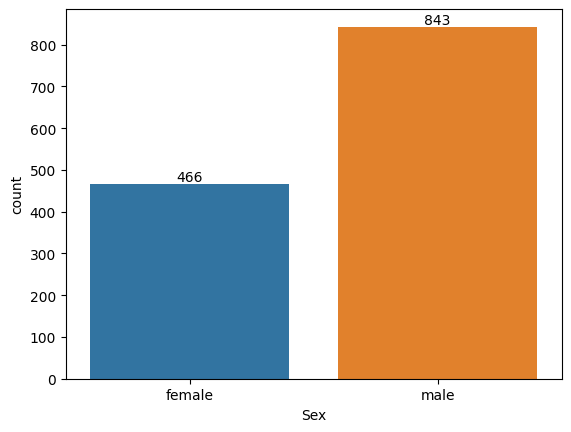

In [397]:
# Plotting Count plot for sex column
ax=sns.countplot(x=data['Sex'],hue = data['Sex'])

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

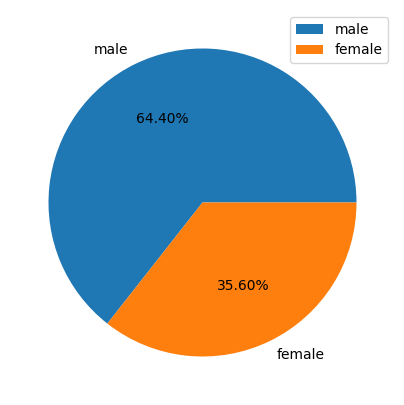

In [398]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

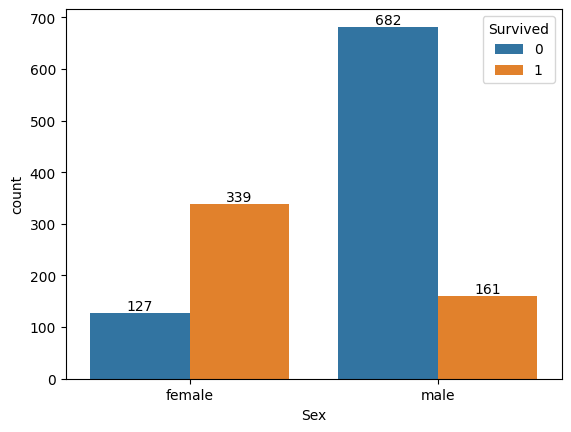

In [399]:
# Showing Distribution of Sex Column Survived Wise
ax = sns.countplot(x=data['Sex'],hue=data['Survived'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

This plot clearly shows male died more than females and females survived more than male percentage.

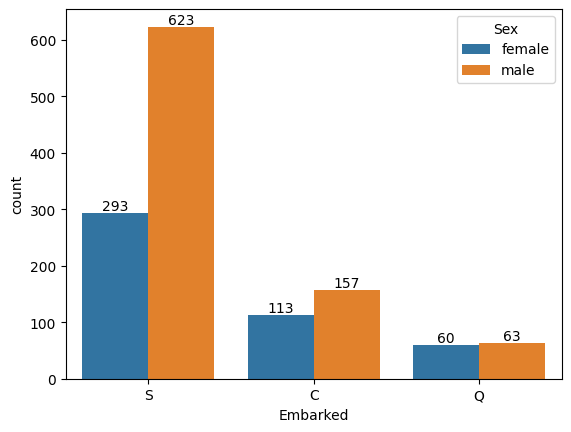

In [400]:
# Showing Distribution of Embarked Sex wise
ax = sns.countplot(x=data['Embarked'],hue=data['Sex'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [404]:
Pclass column

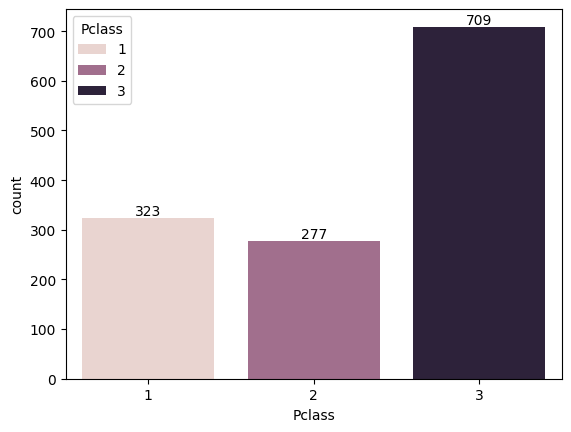

In [405]:
# Plotting CountPlot for Pclass Column
ax = sns.countplot(x=data['Pclass'],hue=data['Pclass'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

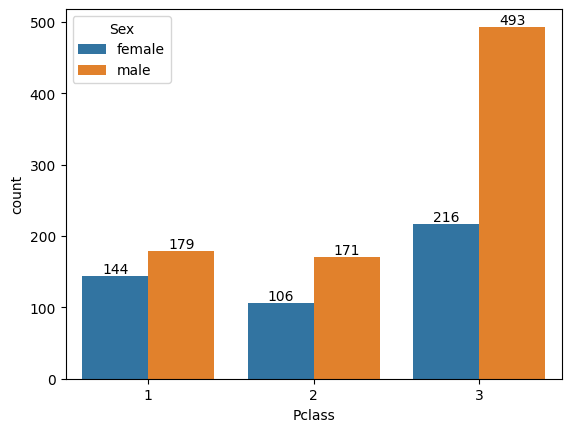

In [406]:
# Showing Distribution of Pclass Sex wise
ax = sns.countplot(x=data['Pclass'],hue=data['Sex'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

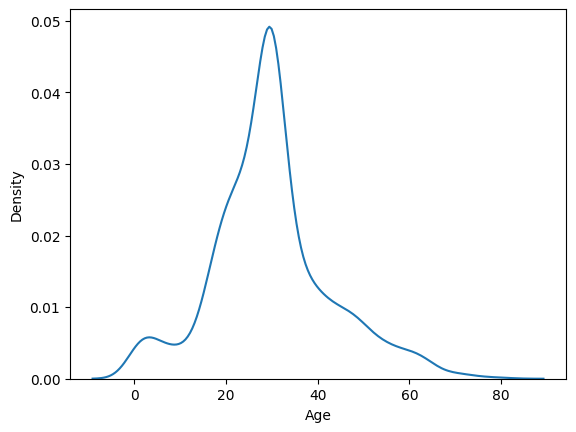

In [407]:
# Age Distribution
sns.kdeplot(x=data['Age'])
plt.show()

Survived
0    809
1    500
Name: count, dtype: int64


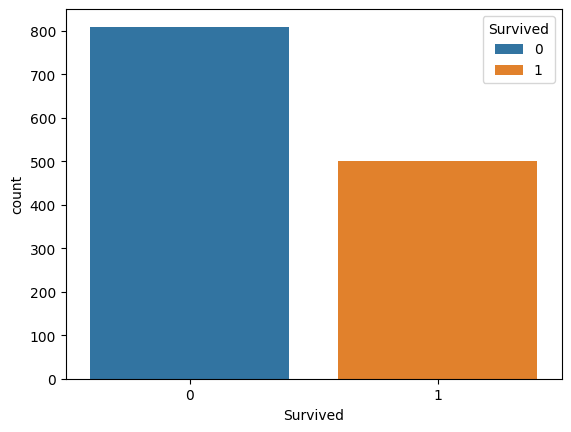

In [408]:
# Plotting CountPlot for Survived Column
print(data['Survived'].value_counts())
sns.countplot(x=data['Survived'],hue=data['Survived'])
plt.show()

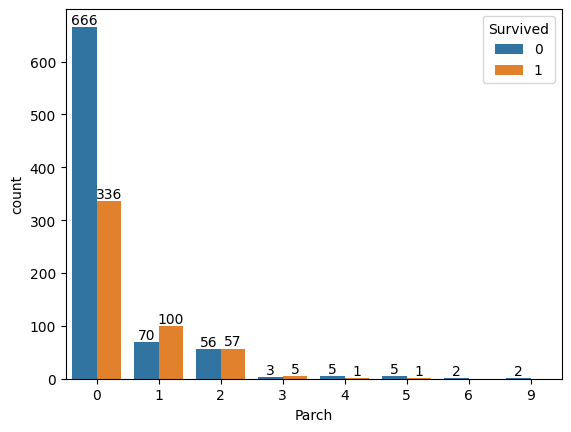

In [409]:
# Showing Distribution of Parch Survived Wise
ax=sns.countplot(x=data['Parch'],hue=data['Survived'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

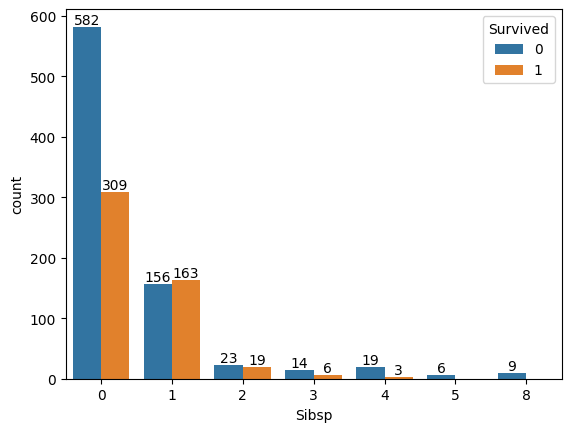

In [410]:
# Showing Distribution of SibSp Survived Wise
ax = sns.countplot(x=data['Sibsp'],hue=data['Survived'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

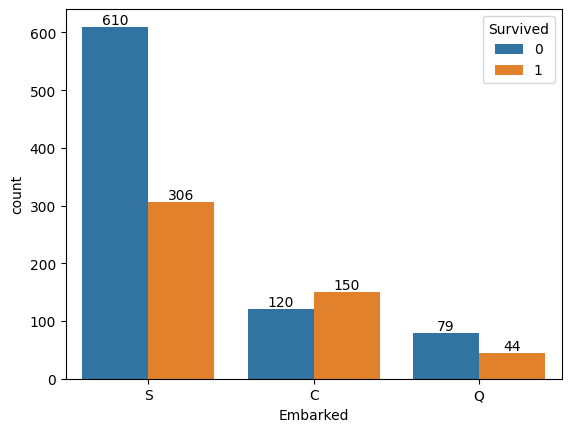

In [411]:
# Showing Distribution of Embarked Survived wise
ax = sns.countplot(x=data['Embarked'],hue=data['Survived'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

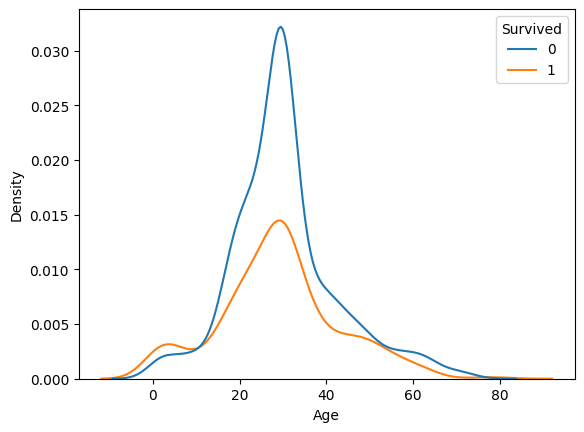

In [412]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=data['Age'],hue=data['Survived'])
plt.show()

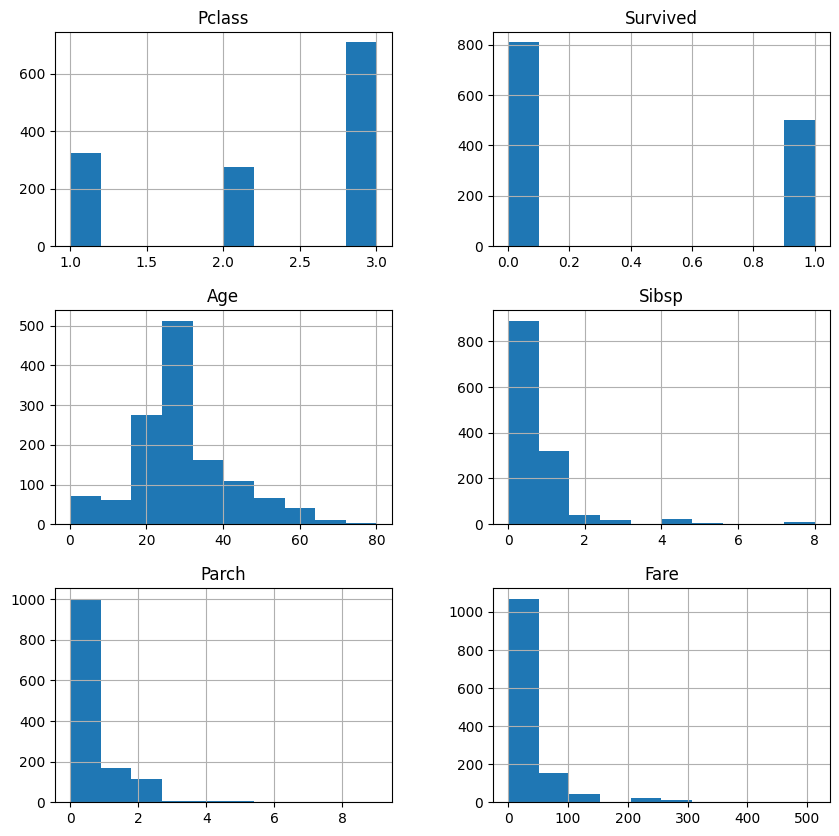

In [413]:
# Plotting Histplot for Dataset
data.hist(figsize=(10,10))
plt.show()

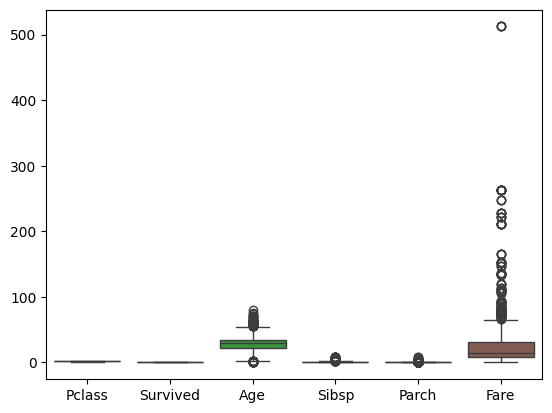

In [414]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(data)
plt.show()

In [415]:
##this plot shows that 2 columns has outliers##

In [416]:
#  showing Correlation

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

            Pclass  Survived       Age     Sibsp     Parch      Fare
Pclass    1.000000 -0.312469 -0.366370  0.060832  0.018322 -0.558629
Survived -0.312469  1.000000 -0.050199 -0.027825  0.082660  0.244265
Age      -0.366370 -0.050199  1.000000 -0.190747 -0.130872  0.171892
Sibsp     0.060832 -0.027825 -0.190747  1.000000  0.373587  0.160238
Parch     0.018322  0.082660 -0.130872  0.373587  1.000000  0.221539
Fare     -0.558629  0.244265  0.171892  0.160238  0.221539  1.000000


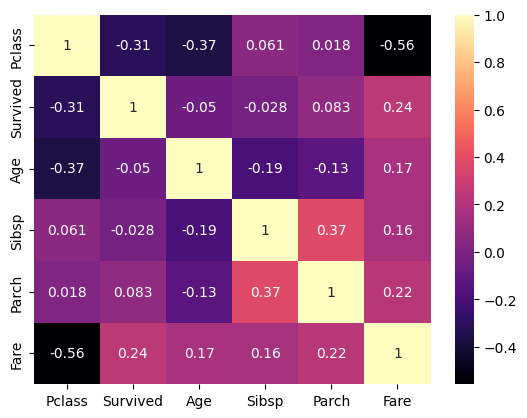

In [417]:
# Showing Correlation Plot
sns.heatmap(numeric_data.corr(),annot=True,cmap='magma')
plt.show()

This Plot is clearly showing

Strong Positive Correlation between SibSp and Parch
Strong Negative Correlation between Pclass and Fare

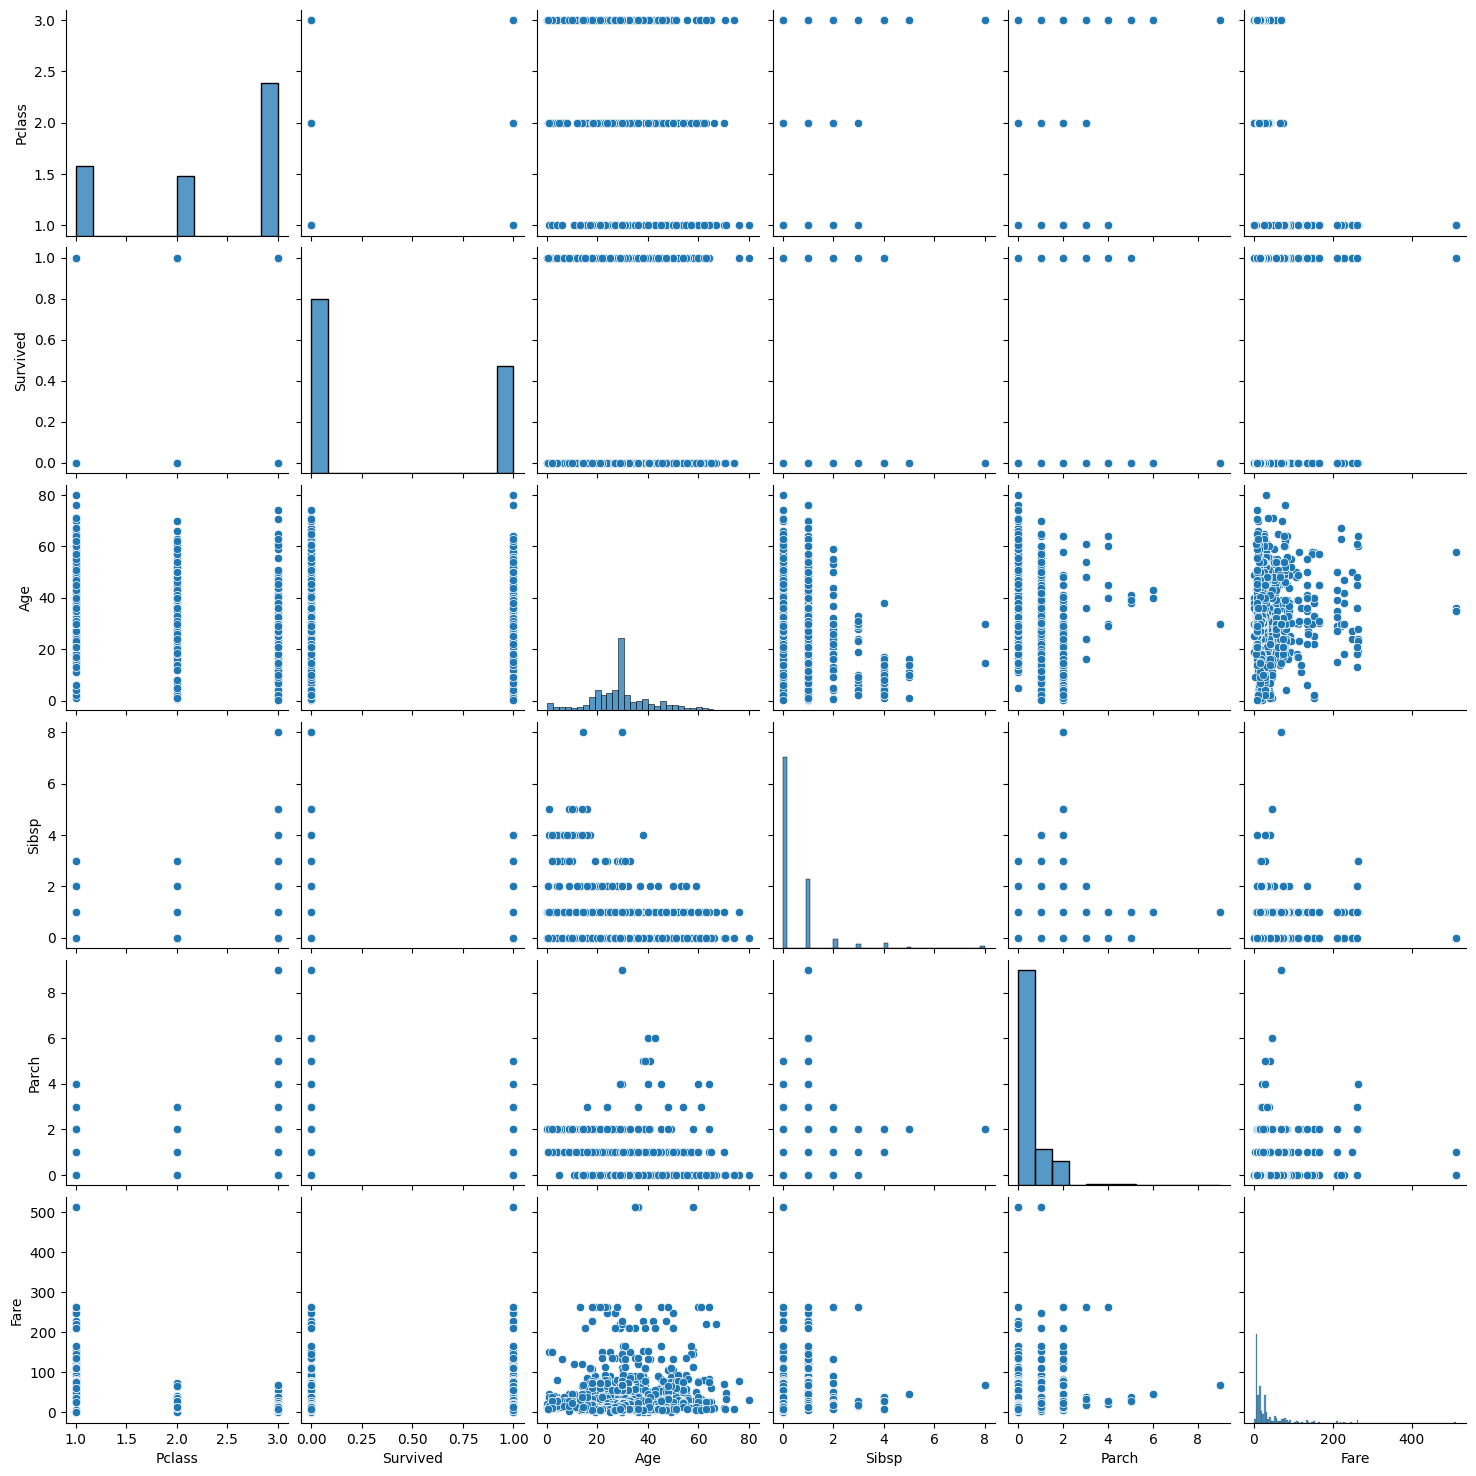

In [418]:
# Plotting pairplot
sns.pairplot(data)
plt.show()

 Encode categorical variables


In [419]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   Sibsp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [421]:
# Select relevant features
X = data[['Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


In [422]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [426]:
# Model Training with Hyperparameter tuning
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [427]:
# Prediction
y_pred = model.predict(X_test)


In [428]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7519083969465649
